# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
np.random.seed(123)

In [3]:
# sampling from multivariate normal distribution and from Bernoulli
x = np.random.multivariate_normal(np.array([0, 0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[-1.0856306 ,  0.99734545],
        [ 0.2829785 , -1.50629471],
        [-0.57860025,  1.65143654],
        [-2.42667924, -0.42891263],
        [ 1.26593626, -0.8667404 ]]),
 array([0, 0, 0, 1, 0]))

In [4]:
# sampling
n = 10000
m1 = np.array([1, 1])
m2 = np.array([0, 0])
sigma = np.array([[1, -0.5], [-0.5, 1]])
Y_generative = np.random.permutation(np.repeat([1, 0], n // 2))
X_generative = np.where(
    np.expand_dims(Y_generative, 1),
    np.random.multivariate_normal(m1, sigma, n),
    np.random.multivariate_normal(m2, sigma, n),
)
X_generative.shape, Y_generative.shape

((10000, 2), (10000,))

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


**Answer:** Using Bayes' theorem, law of total probability and dividing by the numerator:

$$p(y=1|x)=\frac{\pi p(x|y=1)}{p(x)}=\frac{\pi p(x|y=1)}{\pi p(x|y=1)+(1-\pi)p(x|y=-1)}=\frac{1}{1+\frac{1-\pi}{\pi}\frac{p(x|y=-1)}{p(x|y=1)}}$$

Comparing to the logistic function and taking logarithm of both sides:

$$\frac{1}{1+e^{-(\beta_0+\beta'x)}}=\frac{1}{1+\frac{1-\pi}{\pi}\frac{p(x|y=-1)}{p(x|y=1)}}$$

$$e^{-(\beta_0+\beta'x)}=\frac{1-\pi}{\pi}\frac{p(x|y=-1)}{p(x|y=1)}$$

$$-(\beta_0+\beta'x)=\log\frac{1-\pi}{\pi}+\log\frac{p(x|y=-1)}{p(x|y=1)}$$

Substituting densities, skipping constants and transforming:

$$-(\beta_0+\beta'x)=\log\frac{1-\pi}{\pi}+\log\frac{ce^{-\frac{1}{2}(x-\mu_2)'\Sigma^{-1}(x-\mu_2)}}{ce^{-\frac{1}{2}(x-\mu_1)'\Sigma^{-1}(x-\mu_1)}}=$$

$$\log\frac{1-\pi}{\pi}-\frac{1}{2}(x-\mu_2)'\Sigma^{-1}(x-\mu_2)+\frac{1}{2}(x-\mu_1)'\Sigma^{-1}(x-\mu_1)=$$

$$\log\frac{1-\pi}{\pi}-\frac{1}{2}(x'\Sigma^{-1}x-2{\mu_2}'\Sigma^{-1}x+{\mu_2}'\Sigma^{-1}\mu_2)+\frac{1}{2}(x'\Sigma^{-1}x-2{\mu_1}'\Sigma^{-1}x+{\mu_1}'\Sigma^{-1}\mu_1)=$$

$$\log\frac{1-\pi}{\pi}+(\mu_2-\mu_1)'\Sigma^{-1}x-\frac{1}{2}({\mu_2}'\Sigma^{-1}\mu_2-{\mu_1}'\Sigma^{-1}\mu_1)$$

Finally, retrieving the coefficients:

$$\beta_0+\beta'x=\log\frac{\pi}{1-\pi}+\frac{1}{2}({\mu_2}'\Sigma^{-1}\mu_2-{\mu_1}'\Sigma^{-1}\mu_1)+(\mu_1-\mu_2)'\Sigma^{-1}x$$

$$\beta_0=\log\frac{\pi}{1-\pi}+\frac{1}{2}({\mu_2}'\Sigma^{-1}\mu_2-{\mu_1}'\Sigma^{-1}\mu_1)$$

$$\beta=\Sigma^{-1}(\mu_1-\mu_2)$$


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

**Answer:** See above.

In [5]:
# computing beta_0 and beta using the formulas
pi = 0.5
sigma_inv = np.linalg.inv(sigma)
beta0 = np.log(pi / (1 - pi)) + (m2 @ sigma_inv @ m2 - m1 @ sigma_inv @ m1) / 2
beta = sigma_inv @ (m1 - m2)
beta0, beta

(-2.0, array([2., 2.]))

In [6]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
mod_a.intercept_, mod_a.coef_

(array([-1.98076149]), array([[1.97549036, 1.9618007 ]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [7]:
# sampling
n = 10000
beta0 = -2
beta = np.array([2, 2])
X_discriminative = np.where(
    np.expand_dims(np.random.binomial(1, 0.5, n), 1),
    np.random.multivariate_normal(m1, sigma, n),
    np.random.multivariate_normal(m2, sigma, n),
)
Y_discriminative = np.random.binomial(
    1, 1 / (1 + np.exp(-(beta0 + X_discriminative @ beta))), n
)
X_generative.shape, Y_generative.shape,

((10000, 2), (10000,))

In [8]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
mod_b.intercept_, mod_b.coef_

(array([-2.00575139]), array([[2.01995141, 2.03367355]]))

#### Second bullet point

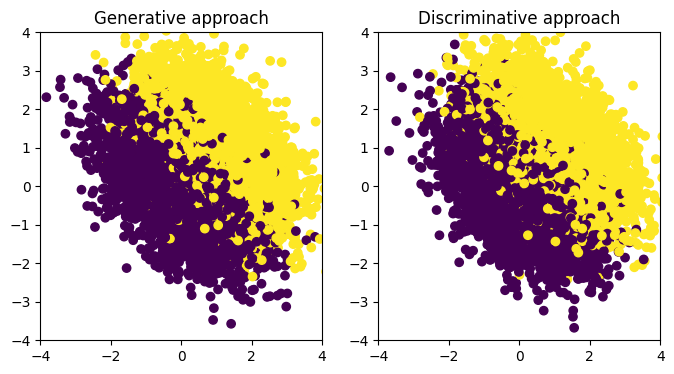

In [9]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Generative approach")
plt.scatter(X_generative[:, 0], X_generative[:, 1], c=Y_generative)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.subplot(1, 2, 2)
plt.title("Discriminative approach")
plt.scatter(X_discriminative[:, 0], X_discriminative[:, 1], c=Y_discriminative)
plt.ylim(-4, 4)
plt.xlim(-4, 4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

**Answer:** A look at the scatter plots shows, that in both approaches the joint distributions $p(x, y)$ are the same. However, the two approaches differ from a simulation perspective. In the generative approach we directly control the probability $\pi$ but not the coefficients $\beta$. In discriminative approach it is the other way around.

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Answer:** Using Bayes' theorem, law of total probability and solving for $p(x|y=-1)$:

$$p(x|y=-1)=\frac{p(y=-1|x)p(x)}{p(y=-1)}=$$

$$\frac{p(y=-1|x)(\pi p(x|y=1) + (1-\pi)p(x|y=-1))}{1-\pi}=$$

$$\frac{\pi}{1-\pi}p(y=-1|x)p(x|y=1)+p(y=-1|x)p(x|y=-1)$$

<br>

$$p(x|y=-1)-p(y=-1|x)p(x|y=-1)=\frac{\pi}{1-\pi}p(y=-1|x)p(x|y=1)$$

$$p(x|y=-1)(1-p(y=-1|x))=\frac{\pi}{1-\pi}p(y=-1|x)p(x|y=1)$$

$$p(x|y=-1)=\frac{\pi}{1-\pi}\frac{p(y=-1|x)}{1-p(y=-1|x)}p(x|y=1)$$

Modeling the emerging inverse odds ratio according to the logistic model:

$$p(x|y=-1)=\frac{\pi}{1-\pi}e^{-(\beta_0+\beta'x)}p(x|y=1)$$

Substituting known a priori probability, coefficient and density:

$$p(x|y=1)=\frac{\frac{1}{3}}{1-\frac{1}{3}}e^{-(\beta_0+x)}e^{-x}=\frac{1}{2}e^{-\beta_0}e^{-2x}$$

Normalizing the obtained probability distribution:

$$\int_0^\infty\frac{1}{2}e^{-\beta_0}e^{-2x}dx=\frac{e^{-\beta_0}}{4}=1$$

$$\beta_0=-\log 4\approx -1.39$$

Final distribution is also exponential:

$$p(x|y=-1)=2e^{-2x}$$

$$p(x|y=-1)\sim Exp(2)$$

In [10]:
# sampling
n1 = 10000
n2 = 20000
gamma1 = 1
gamma2 = 2
Y = np.random.permutation(np.repeat([1, 0], [n1, n2]))
X = np.expand_dims(
    np.where(
        Y,
        np.random.exponential(1 / gamma1, n1 + n2),
        np.random.exponential(1 / gamma2, n1 + n2),
    ),
    1,
)
X.shape, Y.shape

((30000, 1), (30000,))

In [11]:
# a model
mod_c = LogisticRegression(penalty=None)
mod_c.fit(X, Y)
mod_c.intercept_, mod_c.coef_

(array([-1.39223243]), array([[1.00288187]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

**Answer:** Once $\pi$ is fixed, we do not have the freedom to choose an intercept in the logistic model. The intercept in the logistic model depends on $\pi$.

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

**Answer:** See above (and below).

In [12]:
beta1 = 1
pi_c = n1 / (n1 + n2)
beta0 = np.log(pi_c / (1 - pi_c) / (1 + beta1))
beta0

-1.3862943611198908